<table style="float:left">
    <tr>
        <td>
            <img src="emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
        </td>
        <td style="padding-bottom:10px; text-align:left;">
            <h1 style="border-bottom: 1px solid #eeeeee;"> Python BootCamp </h1><br/>
            <span style="display:inline-block; margin-top:-15px;">
            <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS)    
            <br/>
            Sep 2024, Paris | © Saeed VARASTEH [RP] | Jean SAVINIEN
            </span>
        </td>
    </tr>
</table>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#d3dbd3;">
    <img src="quiz.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#476b47">
        <h4 style="padding-top:20px; padding-bottom:5px;"> FINAL EXAM </h4>
    </span>
</div>

<hr style="color:gray;"/>

__Your Name:__ Carla Kim Gaieski

<hr style="color:gray;"/>

<h5 style="color:crimson">Notes:</h5>

<ul>
    <li>Do not forget to enter <b>your name</b> above.</li>
    <li>Do not forget to <b>comment your codes</b>.</li>
    <li>If you used any code from the web, cite the URL from which you took the code.</li>
    <li>Do not share your codes with your friends!</li>
    <li><span style="color:crimson">Remember that the use of generative models is extremely forbidden.</span></li>
    <li> <div style="color:crimson; background-color:#fce6ec">
    In this exam, I want to assess `your` knowledge of programming, not chatgpt!
</div> </li>
</ul>

<h5 style="color:gray">Good Luck!</h5>

---

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

<div style="color:gray; background-color:#eeeeee">
    Marketing Campaign
</div>

The __campaign.csv__ file contains information about a previous marketing campaign. 

For each client we have some features and if they are subscribed or not according to the cntacts made.

The features are:
 
1. __age__: age of the client
2. __job__: client's job type
3. __marital__: marital status
4. __education__: educational Level
5. __default__: has loan credit in default? 
6. __balance__: current bank account balance
7. __housing__: has housing loan?
8. __loan__: has personal loan?
9. __contact__: contact communication type
10. __day__: last contact day of the month
11. __month__: last contact month
12. __num__: number of contacts
13. __subscribed__: has the client subscribed? 0: no, 1: yes.



<div style="color:gray; background-color:#eeeeee">
    Data Cleaning
</div>

__Question 00__
Read the file into a Pandas `DataFrame` and display the first few rows of the dataset to understand its structure.

In [6]:
df = pd.read_csv("./campaign.csv")
df.head(3) #display of first three rows 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,num,subscribed
0,58,management,married,universitiy,no,2143,yes,no,unknown,5,may,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0


__Question 01__ Check the dimensions. How many rows and columns do we have in the data set? 

In [12]:
df.shape #is an attribute to check dimension, giving the number of rows and columns 

#so we have 45211 rows and 13 columns 

(45211, 13)

__Question 02__ Check for missing values. Are there any missing values in the file?

In [16]:
df.isnull().sum() #isnull check for missing values (true or false) and sum will sum all True.

#there are no missing values in this file

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
num           0
subscribed    0
dtype: int64

__Question 03__ Check column data types.

In [22]:
df.dtypes #with dtypes we get the type of each column

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
num            int64
subscribed     int64
dtype: object

__Question 04__ Get some statistical information about the __numerical__ columns (the min, max, average, ...)

In [28]:
df.describe() #with discribe we get statistical information on the numerical columns 

,age,balance,day,num,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,0.116985
std,10.618762,3044.765829,8.322476,3.098021,0.321406
min,18.000000,-8019.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,1.000000


__Question 05__ What are the minimum and maximum __age__ values?

In [44]:
print("The minimun age value is:",df['age'].min()) #min() get us the minimun value of the column and we apply it to the column age

The minimun age value is: 18


In [46]:
print("The maximun age value is:",df['age'].max()) #max() get us the maximun value of the column and we apply it to the column age

The maximun age value is: 95


__Question 06__ What are the different values in the __subscribed__ column?

<span style="color:crimson">Hint:</span> You can use the `value_counts()` function to answer this question.

In [54]:
df['subscribed'].value_counts() #value counts returns how many times the values in subscribed appears, in this case

#we only have 0 and 1, with 39922 and 5289 occurances, respectively. 

subscribed
0    39922
1     5289
Name: count, dtype: int64

__Question 07__ What are the percentages of subscribers and non-subscribers?

<span style="color:crimson">Hint:</span> Divide the values from the previous step by the total number of clients (total number of rows in the dataset).

In [60]:
df.shape #we have 45211 rows = 45211 clients in df

(45211, 13)

In [70]:
tot_clients = 45211

#subscribed: 0 = no, 1 = yes
nosub = 39922
yessub = 5289

per_no = (nosub/tot_clients)*100
per_yes = (yessub/tot_clients)*100

print("The percentage of subscribers is:",per_yes,"%")
print("The percentage of non-subscribers is:",per_no,"%")

The percentage of subscribers is: 11.698480458295547 %
The percentage of non-subscribers is: 88.30151954170445 %


__Question 08__ 

- Convert all "yes" values in the __housing__ column to 1 and all "no" values to 0. 
- Replace all "unknown" values in the __contact__ column to "email".

<span style="color:crimson">Note:</span> Check to see if the values in your dataframe have changed.

In [80]:
df['housing'] = df['housing'].replace(["yes","no"], [1,0])
# by using replace (Exercise 06 in class) we can change the values all together from the housing column of df['housing']

In [82]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,num,subscribed
0,58,management,married,universitiy,no,2143,1,no,unknown,5,may,1,0
1,44,technician,single,secondary,no,29,1,no,unknown,5,may,1,0
2,33,entrepreneur,married,secondary,no,2,1,yes,unknown,5,may,1,0
3,47,blue-collar,married,unknown,no,1506,1,no,unknown,5,may,1,0
4,33,unknown,single,unknown,no,1,0,no,unknown,5,may,1,0


In [84]:
#Replace all "unknown" values in the contact column to "email".

df['contact'] = df['contact'].replace("unknown", "email") 


on the line above we replace unknow with email using the function replace, on the column df.contact

In [89]:
df.head(3) #the new changes in the df were successful 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,num,subscribed
0,58,management,married,universitiy,no,2143,1,no,email,5,may,1,0
1,44,technician,single,secondary,no,29,1,no,email,5,may,1,0
2,33,entrepreneur,married,secondary,no,2,1,yes,email,5,may,1,0


<div class="alert-warning">
    If you have made a mistake and destroyed the values or your DataFrame, do not panic, fix the errors and just run the cells from the beginning.
</div>

----

<div style="color:gray; background-color:#eeeeee">
    Exploratory Data Analysis (EDA)
</div>

<div class="alert-info">
    Remember to check your DataFrame every few steps. 
</div>

In [91]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,num,subscribed
0,58,management,married,universitiy,no,2143,1,no,email,5,may,1,0
1,44,technician,single,secondary,no,29,1,no,email,5,may,1,0
2,33,entrepreneur,married,secondary,no,2,1,yes,email,5,may,1,0
3,47,blue-collar,married,unknown,no,1506,1,no,email,5,may,1,0
4,33,unknown,single,unknown,no,1,0,no,email,5,may,1,0


__Question 09__ Plot the Boxplot of the __balance__ column. Are there any outliers?

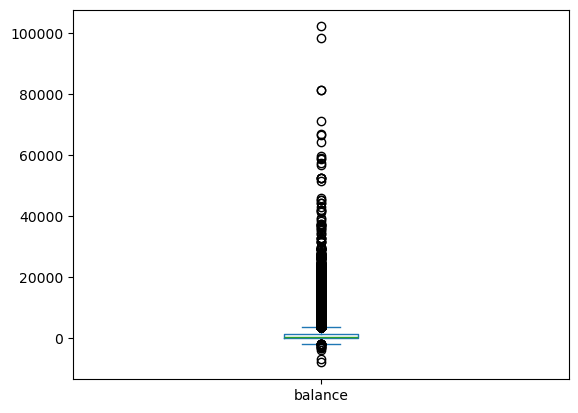

In [103]:
df['balance'].plot(kind = 'box');
#given this boxplot,
#we can see that there are many outliers, the dots that are far from the center of the boxes
#(which were slimmed down due to the large quantity of outliers)

__Question 10__ Extract the information of these outliers.

<span style="color:crimson">Hint:</span> Select all rows where the __balance__ is greater than 80k.

In [109]:
more80k = df[df['balance'] > 80000] #new df called more80k in which we only get values greater than 80000
more80k.head() #show the top 5, but we only have 4 in this df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,num,subscribed
26227,59,management,married,universitiy,no,98417,0,no,telephone,20,nov,5,0
39989,51,management,single,universitiy,no,102127,0,no,cellular,3,jun,1,0
42558,84,retired,married,secondary,no,81204,0,no,telephone,28,dec,1,1
43393,84,retired,married,secondary,no,81204,0,no,telephone,1,apr,1,1


In [117]:
more80k.describe()

,age,balance,housing,day,num,subscribed
count,4.000000,4.000000,4.0,4.000000,4.0,4.00000
mean,69.500000,90738.000000,0.0,13.000000,2.0,0.50000
std,17.058722,11112.615564,0.0,13.140269,2.0,0.57735
min,51.000000,81204.000000,0.0,1.000000,1.0,0.00000
25%,57.000000,81204.000000,0.0,2.500000,1.0,0.00000
50%,71.500000,89810.500000,0.0,11.500000,1.0,0.50000
75%,84.000000,99344.500000,0.0,22.000000,2.0,1.00000
max,84.000000,102127.000000,0.0,28.000000,5.0,1.00000


__Question 11__ Did these clients subscribe after we contacted them? What do they have in common?

These clients are all above 50 years old, the do not have housing loans, they do not have loan credit in default, and they do not have a personal loan. Most have only been contacted once and mostly via a telephone. And they all have a balance higher than 80000. Two of them did subscribe, those whose age is 84, while the two others did not, who are in the 50s. 

---

__Question 12__ What are different job categories and their frequencies. Plot the output as a bar chart.

In [147]:
#source: https://stackoverflow.com/questions/45577884/pandas-value-counts-save-output-to-file/45577966#45577966
#the reset_index(), which we saw in class, appeared in this search to help me solve this question 

In [149]:
jobfre = df['job'].value_counts().reset_index()
jobfre.head()
#create a new df with the frequencey of each job from the dataset, by using value_counts() we get that result and then make it into a df

,job,count
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


__Question 13__ What is the average account __balance__ per __education__ level?  

<span style="color:crimson">Hint:</span> You can use the `groupby()` function to answer this question. 

In [155]:
#use mean() in the group by so that we can get the average 
balance_education = df.groupby("education")["balance"].mean().reset_index()
balance_education

,education,balance
0,primary,1250.949934
1,secondary,1154.880786
2,universitiy,1758.416435
3,unknown,1526.754443


Does this dataset suggest that higher education correlates with greater wealth? Do you believe in this?

Since we only had 4 poeple whose current bank account balance was greater than 80000, and we know that only two of them went to university while the other two only completed their secondary education, we can say that higher education does not correlates with greater wealth. 
And as we can see in this balance_education df, most people have completed university, and still are unable to have more than 80000 in their account balance.

I beleieve that nowadays it is true, especially with the introduction of the internet and social meadia. People have been able to create businesses online from a very young age and found fame at a young age, and therefore they do not complete their studies or go on with them to more advanced levels. So, althought they have more income and more wealth, they are not the most educated part of the population.

__Question 14__ Plot __age__ versus __balance__. Is there a relationship between the two?

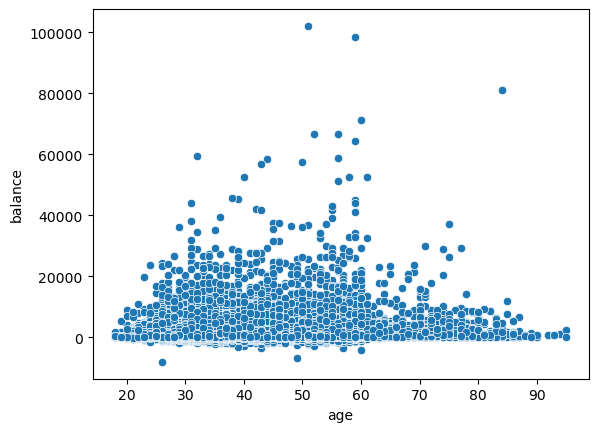

In [163]:
#assuming a scatter plot

sns.scatterplot(data=df, x='age',y = 'balance');

There is a very dense concentration of the population below the age of 60 that are under the balance of 20000. 

Above 60, I guess there is not much population, is it less dense, but they are still more concentrated around 10000 and bellow. 

__Question 15__ What is the average __age__ of clients by __marital__ and by __educational__ level?

<span style="color:crimson">Hint:</span> You can use the `pivot_table()` function to answer this question. 

In [177]:
#in the pivot table our row is the marital, our columns the education,
#our values is what do we want to apply on, and aggfunc what calculation we want which is mean. 

df.pivot_table(index = 'marital', columns = 'education', values = 'age', aggfunc = 'mean')

education,primary,secondary,universitiy,unknown
marital,,,,
divorced,51.494681,44.230906,45.429640,49.295858
married,46.550705,42.363108,42.306053,48.287069
single,36.689332,33.157171,33.818447,34.681818


__Question 16__ Select all the rows where __job__ is "management" and __marital__ status is "married".

In [193]:
display(df.loc[(df['job'] == "management") & (df['marital'] == "married")])
#source https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/

,age,job,marital,education,default,balance,housing,loan,contact,day,month,num,subscribed
0,58,management,married,universitiy,no,2143,1,no,email,5,may,1,0
5,35,management,married,universitiy,no,231,1,no,email,5,may,1,0
21,56,management,married,universitiy,no,779,1,no,email,5,may,1,0
31,49,management,married,universitiy,no,378,1,no,email,5,may,1,0
34,51,management,married,universitiy,no,10635,1,no,email,5,may,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45161,31,management,married,universitiy,no,720,1,no,cellular,9,nov,3,0
45169,31,management,married,universitiy,no,2994,1,no,cellular,10,nov,1,0
45194,59,management,married,universitiy,no,138,1,yes,cellular,16,nov,2,0
45198,37,management,married,universitiy,no,1428,0,no,cellular,16,nov,2,0


In [197]:
pd.crosstab(df['job'], df['marital']) #it has values, before I got 0 results, so I wanted to see if there were any values for it

marital,divorced,married,single
job,,,
admin.,750,2693,1728
blue-collar,750,6968,2014
entrepreneur,179,1070,238
housemaid,184,912,144
management,1111,5400,2947
retired,425,1731,108
self-employed,140,993,446
services,549,2407,1198
student,6,54,878


---

__Question 17__ What does the following code output?

In [199]:
df.groupby("contact")["subscribed"].value_counts()

contact    subscribed
cellular   0             24916
           1              4369
email      0             12490
           1               530
telephone  0              2516
           1               390
Name: count, dtype: int64

You get the total value counts (the amount that each value appears), of the number of subscribed people per contact, the way they were contacted.

So,
- people contacted by cellular: 24916 did not subscribed and 4369 did;
- people contacted by email: 12490 did not subscribed and 530 did;
- people contacted by telephone: 2516 did not subscribed and 390 did;

__Question 18__ Save the output of the previous step as a new dataframe. Name this dataframe as __ds__.

<span style="color:crimson">Hint:</span> You can use the `reset_index()` function.

The new dataframe should look like this:

| | contact | subscribed | count |
| --- | --- | --- | --- |
| __0__ | cellular  | 0 | 24916 | 
| __1__ | cellular  | 1 | 4369 |
| ... | ...  | ... |  ... | 
| __5__ | unknown  | 1 |530 |

In [217]:
ds = df.groupby("contact")["subscribed"].value_counts().reset_index()
ds

,contact,subscribed,count
0,cellular,0,24916
1,cellular,1,4369
2,email,0,12490
3,email,1,530
4,telephone,0,2516
5,telephone,1,390


__Question 19__ Use the __ds__ dataframe to create this plot.

<img style="width:300px;" src="contacts.png"> </img>

<span style="color:crimson">Hint:</span> I used `sns.barplot()` function for this. You must specify `data`, `x`, `y` and `hue` values for this function to work.

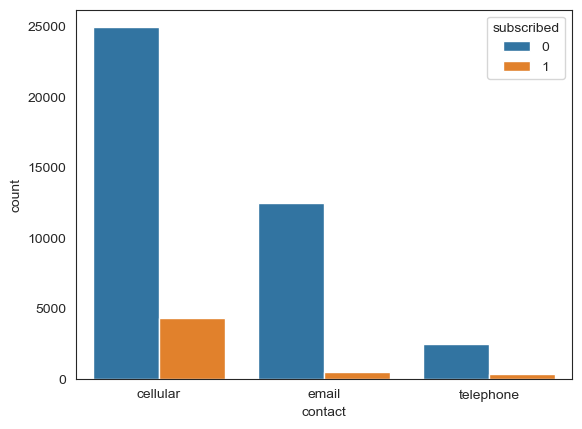

In [269]:
sns.set_style("white")
sns.barplot(data=ds, x="contact", y="count",hue = 'subscribed', palette='tab10');

#https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/ to understand hue which is to have the subscribed
#https://seaborn.pydata.org/tutorial/color_palettes.html for the correct color palette

---

__Question 20__ What is the total number of subscriptions per month? Create the following line chart. 

<img style="width:400px;" src="months.png"> </img>

On the x-axis we have the months and on the y-axis we have the total number of subscriptions.

In [255]:
#Write a code to give the total number of hospitalized persons per department.

add = df.groupby("month")["subscribed"].sum().reset_index()
add.head()
#make a dataframe with the month and subscribed called add

,month,subscribed
0,apr,577
1,aug,688
2,dec,100
3,feb,441
4,jan,142


In [257]:
x = add['month']
y = add['subscribed']
#create x and y variables 

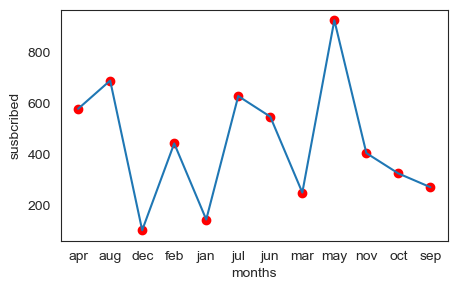

In [265]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3)) #decide how many plots we want = 1 plot 
ax.plot(x,y);
ax.scatter(x,y,color="red");

plt.xlabel('months');
plt.ylabel('susbcribed');

---

Anything else?

Thank you for the wonderdul classes professor!

Happy holidays! :D

---

<div style="text-align: right; color:Gray;">
    Have a great afternoon! <br/>
    And in case I don't see you again, Happy new year!
</div>

---